# Mini-Project: Data Wrangling and Transformation with Pandas

Working with tabular data is a necessity for anyone with enterprises having a majority of their data in relational databases and flat files. This mini-project is adopted from the excellent tutorial on pandas by Brandon Rhodes which you have watched earlier in the Data Wrangling Unit. In this mini-project, we will be looking at some interesting data based on movie data from the IMDB.

This assignment should help you reinforce the concepts you learnt in the curriculum for Data Wrangling and sharpen your skills in using Pandas. Good Luck!

### Please make sure you have one of the more recent versions of Pandas

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
pd.__version__

'0.24.2'

## Taking a look at the Movies dataset
This data shows the movies based on their title and the year of release

In [3]:
movies = pd.read_csv('titles.csv')
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244914 entries, 0 to 244913
Data columns (total 2 columns):
title    244914 non-null object
year     244914 non-null int64
dtypes: int64(1), object(1)
memory usage: 3.7+ MB


In [4]:
movies.head()

,title,year
0,The Ticket to the Life,2009
1,Parallel Worlds: A New Rock Music Experience,2016
2,Morita - La hija de Jesus,2008
3,Gun,2017
4,Love or Nothing at All,2014


## Taking a look at the Cast dataset

This data shows the cast (actors, actresses, supporting roles) for each movie

- The attribute `n` basically tells the importance of the cast role, lower the number, more important the role.
- Supporting cast usually don't have any value for `n`

In [5]:
cast = pd.read_csv('cast.csv.zip')
cast.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3786176 entries, 0 to 3786175
Data columns (total 6 columns):
title        object
year         int64
name         object
type         object
character    object
n            float64
dtypes: float64(1), int64(1), object(4)
memory usage: 173.3+ MB


In [6]:
cast.head(10)

,title,year,name,type,character,n
0,Closet Monster,2015,Buffy #1,actor,Buffy 4,31.0
1,Suuri illusioni,1985,Homo $,actor,Guests,22.0
2,Battle of the Sexes,2017,$hutter,actor,Bobby Riggs Fan,10.0
3,Secret in Their Eyes,2015,$hutter,actor,2002 Dodger Fan,NaN
4,Steve Jobs,2015,$hutter,actor,1988 Opera House Patron,NaN
5,Straight Outta Compton,2015,$hutter,actor,Club Patron,NaN
6,Straight Outta Compton,2015,$hutter,actor,Dopeman,NaN
7,For Thy Love 2,2009,Bee Moe $lim,actor,Thug 1,NaN
8,"Lapis, Ballpen at Diploma, a True to Life Journey",2014,Jori ' Danilo' Jurado Jr.,actor,Jaime (young),9.0
9,Desire (III),2014,Syaiful 'Ariffin,actor,Actor Playing Eteocles from 'Antigone',NaN


## Taking a look at the Release dataset

This data shows details of when each movie was release in each country with the release date

In [7]:
release_dates = pd.read_csv('release_dates.csv', parse_dates=['date'], infer_datetime_format=True)
release_dates.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 479488 entries, 0 to 479487
Data columns (total 4 columns):
title      479488 non-null object
year       479488 non-null int64
country    479488 non-null object
date       479488 non-null datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 14.6+ MB


In [8]:
release_dates.head()

,title,year,country,date
0,"#73, Shaanthi Nivaasa",2007,India,2007-06-15
1,#BKKY,2016,Cambodia,2017-10-12
2,#Beings,2015,Romania,2015-01-29
3,#Captured,2017,USA,2017-09-05
4,#Ewankosau saranghaeyo,2015,Philippines,2015-01-21


# Section I - Basic Querying, Filtering and Transformations

### What is the total number of movies?

In [9]:
len(movies)

244914

### List all Batman movies ever made

In [10]:
batman_df = movies[movies.title == 'Batman']
print('Total Batman Movies:', len(batman_df))
batman_df

Total Batman Movies: 2


,title,year
52734,Batman,1943
150621,Batman,1989


### List all Batman movies ever made - the right approach

In [11]:
batman_df = movies[movies.title.str.contains('Batman', case=False)]
print('Total Batman Movies:', len(batman_df))
batman_df.head(10)

Total Batman Movies: 35


,title,year
16813,Batman: Anarchy,2016
30236,Batman Forever,1995
31674,Batman Untold,2010
31711,Scooby-Doo & Batman: the Brave and the Bold,2018
41881,Batman the Rise of Red Hood,2018
43484,Batman: Return of the Caped Crusaders,2016
46333,Batman & Robin,1997
51811,Batman Revealed,2012
52734,Batman,1943
56029,Batman Beyond: Rising Knight,2014


### Display the top 15 Batman movies in the order they were released

In [12]:
batman_df.sort_values(by=['year'], ascending=True).iloc[:15]

,title,year
52734,Batman,1943
100056,Batman and Robin,1949
161439,Batman Dracula,1964
84327,Alyas Batman at Robin,1965
68364,James Batman,1966
161527,Batman: The Movie,1966
56159,Batman Fights Dracula,1967
168504,"Fight! Batman, Fight!",1973
150621,Batman,1989
156239,Alyas Batman en Robin,1991


### Section I - Q1 : List all the 'Harry Potter' movies from the most recent to the earliest

In [17]:
harrypotter_df = movies[movies.title.str.contains('Harry Potter', case=False)]
harrypotter_df.sort_values(by=['year'], ascending=False)

,title,year
143147,Harry Potter and the Deathly Hallows: Part 2,2011
152831,Harry Potter and the Deathly Hallows: Part 1,2010
109213,Harry Potter and the Half-Blood Prince,2009
50581,Harry Potter and the Order of the Phoenix,2007
187926,Harry Potter and the Goblet of Fire,2005
61957,Harry Potter and the Prisoner of Azkaban,2004
82791,Harry Potter and the Chamber of Secrets,2002
223087,Harry Potter and the Sorcerer's Stone,2001


### How many movies were made in the year 2017?

In [18]:
len(movies[movies.year == 2017])

11474

### Section I - Q2 : How many movies were made in the year 2015?

In [19]:
len(movies[movies.year == 2015])

8702

### Section I - Q3 : How many movies were made from 2000 till 2018?
- You can chain multiple conditions using OR (`|`) as well as AND (`&`) depending on the condition

In [20]:
len(movies[(movies.year >= 2000) & (movies.year <= 2018)])

114070

### Section I - Q4: How many movies are titled "Hamlet"?

In [22]:
len(movies[movies['title']=='Hamlet'])

20

### Section I - Q5: List all movies titled "Hamlet" 
- The movies should only have been released on or after the year 2000
- Display the movies based on the year they were released (earliest to most recent)

In [28]:
hamlet_df = movies[(movies['title']=='Hamlet') & (movies['year'] >=2000)]
hamlet_df.sort_values(by='year', ascending=True)

,title,year
55639,Hamlet,2000
1931,Hamlet,2009
227953,Hamlet,2011
178290,Hamlet,2014
186137,Hamlet,2015
191940,Hamlet,2016
244747,Hamlet,2017


### Section I - Q6: How many roles in the movie "Inception" are of the supporting cast (extra credits)
- supporting cast are NOT ranked by an "n" value (NaN)
- check for how to filter based on nulls

In [33]:
inception_cast = cast[cast['title'] == 'Inception']
len(inception_cast[inception_cast['n'].isna()])

27

### Section I - Q7: How many roles in the movie "Inception" are of the main cast
- main cast always have an 'n' value

In [37]:
len(inception_cast[inception_cast['n'].notnull()])

51

### Section I - Q8: Show the top ten cast (actors\actresses) in the movie "Inception" 
- main cast always have an 'n' value
- remember to sort!

In [39]:
inception_cast.sort_values(by='n', ascending=True).iloc[0:10]

,title,year,name,type,character,n
590576,Inception,2010,Leonardo DiCaprio,actor,Cobb,1.0
859993,Inception,2010,Joseph Gordon-Levitt,actor,Arthur,2.0
3387147,Inception,2010,Ellen Page,actress,Ariadne,3.0
940923,Inception,2010,Tom Hardy,actor,Eames,4.0
2406531,Inception,2010,Ken Watanabe,actor,Saito,5.0
1876301,Inception,2010,Dileep Rao,actor,Yusuf,6.0
1615709,Inception,2010,Cillian Murphy,actor,Robert Fischer,7.0
183937,Inception,2010,Tom Berenger,actor,Browning,8.0
2765969,Inception,2010,Marion Cotillard,actress,Mal,9.0
1826027,Inception,2010,Pete Postlethwaite,actor,Maurice Fischer,10.0


### Section I - Q9:

(A) List all movies where there was a character 'Albus Dumbledore' 

(B) Now modify the above to show only the actors who played the character 'Albus Dumbledore'
- For Part (B) remember the same actor might play the same role in multiple movies

In [40]:
cast[cast['character'] == 'Albus Dumbledore']

,title,year,name,type,character,n
704984,Epic Movie,2007,Dane Farwell,actor,Albus Dumbledore,17.0
792421,Harry Potter and the Goblet of Fire,2005,Michael Gambon,actor,Albus Dumbledore,37.0
792423,Harry Potter and the Order of the Phoenix,2007,Michael Gambon,actor,Albus Dumbledore,36.0
792424,Harry Potter and the Prisoner of Azkaban,2004,Michael Gambon,actor,Albus Dumbledore,27.0
947789,Harry Potter and the Chamber of Secrets,2002,Richard Harris,actor,Albus Dumbledore,32.0
947790,Harry Potter and the Sorcerer's Stone,2001,Richard Harris,actor,Albus Dumbledore,1.0
1685537,Ultimate Hero Project,2013,George (X) O'Connor,actor,Albus Dumbledore,NaN
2248085,Potter,2015,Timothy Tedmanson,actor,Albus Dumbledore,NaN


In [41]:
cast[cast['character'] == 'Albus Dumbledore'].drop_duplicates(subset='name')

,title,year,name,type,character,n
704984,Epic Movie,2007,Dane Farwell,actor,Albus Dumbledore,17.0
792421,Harry Potter and the Goblet of Fire,2005,Michael Gambon,actor,Albus Dumbledore,37.0
947789,Harry Potter and the Chamber of Secrets,2002,Richard Harris,actor,Albus Dumbledore,32.0
1685537,Ultimate Hero Project,2013,George (X) O'Connor,actor,Albus Dumbledore,NaN
2248085,Potter,2015,Timothy Tedmanson,actor,Albus Dumbledore,NaN


### Section I - Q10:

(A) How many roles has 'Keanu Reeves' played throughout his career?

(B) List the leading roles that 'Keanu Reeves' played on or after 1999 in order by year.

In [42]:
cast.head()

,title,year,name,type,character,n
0,Closet Monster,2015,Buffy #1,actor,Buffy 4,31.0
1,Suuri illusioni,1985,Homo $,actor,Guests,22.0
2,Battle of the Sexes,2017,$hutter,actor,Bobby Riggs Fan,10.0
3,Secret in Their Eyes,2015,$hutter,actor,2002 Dodger Fan,NaN
4,Steve Jobs,2015,$hutter,actor,1988 Opera House Patron,NaN


In [44]:
len(cast[cast['name']=='Keanu Reeves'])

62

In [58]:
keanureeves_df = cast[cast['name']=='Keanu Reeves']
keanureeves_df[(keanureeves_df['year'] >= 1999) & (keanureeves_df['n']==1)].sort_values(by='year', ascending=True)

,title,year,name,type,character,n
1892390,The Matrix,1999,Keanu Reeves,actor,Neo,1.0
1892397,The Replacements,2000,Keanu Reeves,actor,Shane Falco,1.0
1892358,Hard Ball,2001,Keanu Reeves,actor,Conor O'Neill,1.0
1892383,Sweet November,2001,Keanu Reeves,actor,Nelson Moss,1.0
1892348,Constantine,2005,Keanu Reeves,actor,John Constantine,1.0
1892388,The Lake House,2006,Keanu Reeves,actor,Alex Wyler,1.0
1892382,Street Kings,2008,Keanu Reeves,actor,Detective Tom Ludlow,1.0
1892385,The Day the Earth Stood Still,2008,Keanu Reeves,actor,Klaatu,1.0
1892359,Henry's Crime,2010,Keanu Reeves,actor,Henry Torne,1.0
1892342,47 Ronin,2013,Keanu Reeves,actor,Kai,1.0


### Section I - Q11: 

(A) List the total number of actor and actress roles available from 1950 - 1960

(B) List the total number of actor and actress roles available from 2007 - 2017

In [49]:
cast[(cast['year'] >= 1950) & (cast['year'] <= 1960)]

234635

In [50]:
cast[(cast['year'] >= 2007) & (cast['year'] <= 2017)]

1452413

### Section I - Q12: 

(A) List the total number of leading roles available from 2000 to present

(B) List the total number of non-leading roles available from 2000 - present (exclude support cast)

(C) List the total number of support\extra-credit roles available from 2000 - present

In [59]:
cast[(cast['year'] >= 2000) & (cast['n'] == 1)]

,title,year,name,type,character,n
102,Live Freaky Die Freaky,2006,Nick 13,actor,TV Reporter #1,1.0
138,All Things Fall Apart,2011,50 Cent,actor,Deon,1.0
144,Freelancers,2012,50 Cent,actor,Malo,1.0
145,Get Rich or Die Tryin',2005,50 Cent,actor,Marcus,1.0
146,Gun,2010,50 Cent,actor,Rich,1.0
154,Setup,2011,50 Cent,actor,Sonny,1.0
165,La hora cero,2010,Zapata 666,actor,Parca,1.0
243,Mezhzvyozdnyie voyny. Sila probuzhdayetsya,2015,Sergey A.,actor,Volodya,1.0
244,Mezhzvyozdnyie voyny. Sila probuzhdayetsya,2015,Sergey A.,actor,Vade Dartus,1.0
245,Mortem (III),2016,Sergey A.,actor,Anton Alexandrov,1.0


In [60]:
cast[(cast['year'] >= 2000) & (cast['n'] >= 1) & (cast['n'].notnull())]

,title,year,name,type,character,n
0,Closet Monster,2015,Buffy #1,actor,Buffy 4,31.0
2,Battle of the Sexes,2017,$hutter,actor,Bobby Riggs Fan,10.0
8,"Lapis, Ballpen at Diploma, a True to Life Journey",2014,Jori ' Danilo' Jurado Jr.,actor,Jaime (young),9.0
10,When the Man Went South,2014,Taipaleti 'Atu'ake,actor,Two Palms - Ua'i Paame,8.0
11,Little Angel (Angelita),2015,Michael 'babeepower' Viera,actor,Chico,9.0
16,My Song for You,2010,George 'Bootsy' Thomas,actor,Cooley's Customer,16.0
17,My Song for You,2010,George 'Bootsy' Thomas,actor,Celebration Guest,16.0
27,De la calle,2001,Luis 'El Plojo',actor,Froil?n plaza del estudiante,80.0
29,They Want Dick Dickster,2015,Zhavier' (II) 'Fox,actor,Dr. Shrinkalotsky,25.0
30,Mahogany Sunrise,2014,Gilberto 'Ghetto Bird' Bahena,actor,Jesse,21.0


In [63]:
cast[(cast['year'] >= 2000) & (cast['n'].isna())]

,title,year,name,type,character,n
3,Secret in Their Eyes,2015,$hutter,actor,2002 Dodger Fan,NaN
4,Steve Jobs,2015,$hutter,actor,1988 Opera House Patron,NaN
5,Straight Outta Compton,2015,$hutter,actor,Club Patron,NaN
6,Straight Outta Compton,2015,$hutter,actor,Dopeman,NaN
7,For Thy Love 2,2009,Bee Moe $lim,actor,Thug 1,NaN
9,Desire (III),2014,Syaiful 'Ariffin,actor,Actor Playing Eteocles from 'Antigone',NaN
13,The Replacements,2000,Steven 'Bear'Boyd,actor,Defensive Tackle - Washington Sentinels,NaN
14,All Out Dysfunktion!,2016,Kirlew 'bliss' Vilbon,actor,Bliss,NaN
15,Gook,2017,Kirlew 'bliss' Vilbon,actor,Bliss,NaN
18,Hustle Beach,2017,Pete 'Boretta' Torres,actor,Tony,NaN


# Section II - Aggregations, Transformations and Visualizations

## What are the top ten most common movie names of all time?


In [64]:
top_ten = movies.title.value_counts()[:10]
top_ten

Hamlet                  20
Carmen                  17
Macbeth                 16
Maya                    12
Temptation              12
The Outsider            12
Freedom                 11
Othello                 11
Honeymoon               11
The Three Musketeers    11
Name: title, dtype: int64

### Plot the top ten common movie names of all time

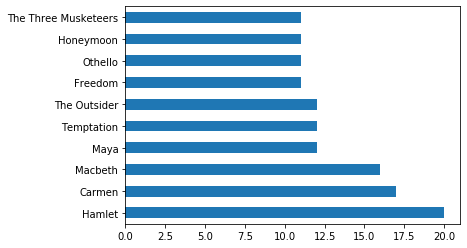

In [65]:
top_ten.plot(kind='barh')

### Section II - Q1:  Which years in the 2000s saw the most movies released? (Show top 3)

In [69]:
most_released = movies[(movies['year'] >= 2000) & (movies['year'] < 2010)].year.value_counts()[:3]
most_released

2009    6125
2008    5151
2007    4467
Name: year, dtype: int64

### Section II - Q2: # Plot the total number of films released per-decade (1890, 1900, 1910,....)
- Hint: Dividing the year and multiplying with a number might give you the decade the year falls into!
- You might need to sort before plotting

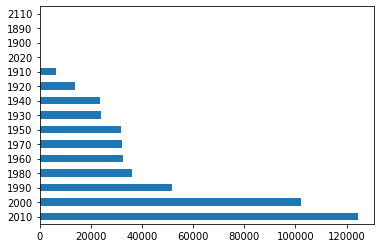

In [80]:
release_dates['decade'] = (release_dates['year']//10)*10
release_dates.decade.value_counts().plot(kind='barh')

### Section II - Q3: 

(A) What are the top 10 most common character names in movie history?

(B) Who are the top 10 people most often credited as "Herself" in movie history?

(C) Who are the top 10 people most often credited as "Himself" in movie history?

In [74]:
cast.name.value_counts()[:10]

Bess Flowers       835
Herman Hack        702
Sam (II) Harris    667
Lee Phelps         624
Harold Miller      624
Frank O'Connor     613
Franklyn Farnum    570
Tom London         565
Larry Steers       559
Frank Ellis        546
Name: name, dtype: int64

In [75]:
cast[cast['type'] == 'actress'].name.value_counts()[:10]

Bess Flowers       835
Aruna Irani        301
Mary Gordon        286
Helen              265
Gertrude Astor     243
Leonor G?mez       234
Minerva Urecal     228
Dorothy Vernon     222
Suzanne Ridgway    217
Sukumari           210
Name: name, dtype: int64

In [76]:
cast[cast['type'] == 'actor'].name.value_counts()[:10]

Herman Hack        702
Sam (II) Harris    667
Harold Miller      624
Lee Phelps         624
Frank O'Connor     613
Franklyn Farnum    570
Tom London         565
Larry Steers       559
Frank Ellis        546
Bud Osborne        512
Name: name, dtype: int64

### Section II - Q4: 

(A) What are the top 10 most frequent roles that start with the word "Zombie"?

(B) What are the top 10 most frequent roles that start with the word "Police"?

- Hint: The `startswith()` function might be useful

In [81]:
cast.head()

,title,year,name,type,character,n
0,Closet Monster,2015,Buffy #1,actor,Buffy 4,31.0
1,Suuri illusioni,1985,Homo $,actor,Guests,22.0
2,Battle of the Sexes,2017,$hutter,actor,Bobby Riggs Fan,10.0
3,Secret in Their Eyes,2015,$hutter,actor,2002 Dodger Fan,NaN
4,Steve Jobs,2015,$hutter,actor,1988 Opera House Patron,NaN


In [87]:
cast[cast['character'].str.startswith('Zombie') == True].sort_values(by='n', ascending=True)[:10]

,title,year,name,type,character,n
2669178,2056 Escape from Zombie Island,2012,Annya Bright,actress,Zombie,1.0
400724,Zombie Boy,2015,Matthew Cheney,actor,Zombie Boy,1.0
2965317,Last Rites of the Dead,2006,Jenny Greeman,actress,Zombie on Snuff Tape,1.0
2062622,Zombie ja Kummitusjuna,1991,Silu Sepp?l?,actor,Zombie,1.0
1176500,Zombie Cop,1991,Michael Kemper,actor,Zombie Cop,1.0
283948,2056 Escape from Zombie Island,2012,Andrew Jeffrey Brown,actor,Zombie,2.0
3426137,I Am Bish,2009,Vanessa Pitrau,actress,Zombie,2.0
1370886,The War on the War on Drugs,2002,Yuri Lowenthal,actor,Zombie,2.0
82532,The Angry Nerd,2017,Eric (XII) Arnold,actor,Zombie #1,2.0
3456562,H1Z1: Infected,2016,Shay Ran,actress,Zombie,3.0


In [88]:
cast[cast['character'].str.startswith('Police') == True].sort_values(by='n', ascending=True)[:10]

,title,year,name,type,character,n
213166,The Panther's Claw,1942,Sidney Blackmer,actor,Police Commissioner Thatcher Colt,1.0
2238014,Accadde al commissariato,1954,Nino Taranto,actor,Police Chief,1.0
845219,Drive In Massacre,1976,John F. Goff,actor,Police Det. Mike Leary,1.0
1014814,Defenders of the Law,1931,John (II) Holland,actor,Police Captain Bill Houston,1.0
1019718,Making the Headlines,1938,Jack Holt,actor,Police Lt. Lewis Nagel,1.0
2279039,I mostri,1963,Ugo Tognazzi,actor,"Policeman (segment ""Il Mostro"")",1.0
1020153,The Yesterday Machine,1963,Tim Holt,actor,Police Lt. Partane,1.0
17257,How's Your Love Life?,1971,John Agar,actor,Police Lt. Rafferty,1.0
839286,Murder on a Bridle Path,1936,James Gleason,actor,Police Insp. Oscar Piper,1.0
1174122,Parole Racket,1937,Paul Kelly,actor,Police Lieutenant Tony Roberts,1.0


### Section II - Q5: Plot how many roles 'Keanu Reeves' has played in each year of his career.

In [89]:
cast[cast['name'] == 'Keanu Reeves'].year.value_counts()

2016    5
1988    4
1993    4
2003    3
2017    3
1986    3
1999    3
1991    3
2000    3
2005    3
2001    2
1996    2
1997    2
2008    2
2006    2
1990    2
1989    2
2013    2
1995    2
1992    1
2019    1
1994    1
2018    1
2009    1
2010    1
2012    1
2014    1
2015    1
1985    1
Name: year, dtype: int64

### Section II - Q6: Plot the cast positions (n-values) of Keanu Reeve's roles through his career over the years.


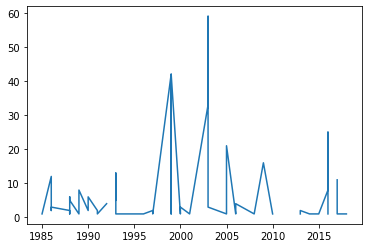

In [94]:
keanu_positions = cast[cast['name'] == 'Keanu Reeves']
keanu_positions = keanu_positions.sort_values('year')
plt.plot(keanu_positions['year'], keanu_positions['n'])

### Section II - Q7: Plot the number of "Hamlet" films made by each decade

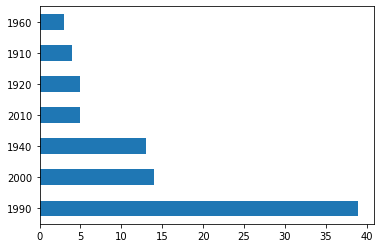

In [97]:
release_dates['decade'] = (release_dates['year']//10)*10
release_dates[release_dates['title'] == 'Hamlet'].decade.value_counts().plot(kind='barh')

### Section II - Q8: 

(A) How many leading roles were available to both actors and actresses, in the 1960s (1960-1969)?

(B) How many leading roles were available to both actors and actresses, in the 2000s (2000-2009)?

- Hint: A specific value of n might indicate a leading role

In [99]:
len(cast[(cast['year'] >= 1960) & (cast['year'] <1970) & (cast['n'] == 1)])

11823

In [100]:
len(cast[(cast['year'] >= 2000) & (cast['year'] <2010) & (cast['n'] == 1)])

26344

### Section II - Q9: List, in order by year, each of the films in which Frank Oz has played more than 1 role.

In [108]:
frankoz_df = cast[cast['name'] == 'Frank Oz']
frankoz_df[frankoz_df['title'].duplicated(keep=False)].sort_values(by='year')

,title,year,name,type,character,n
1723652,The Muppet Movie,1979,Frank Oz,actor,Motorcycle Guy,2.0
1723651,The Muppet Movie,1979,Frank Oz,actor,Swedish Chef (assistant),2.0
1723650,The Muppet Movie,1979,Frank Oz,actor,Marvin Suggs,2.0
1723649,The Muppet Movie,1979,Frank Oz,actor,Doc Hopper's Men,2.0
1723648,The Muppet Movie,1979,Frank Oz,actor,Sam the Eagle,2.0
1723647,The Muppet Movie,1979,Frank Oz,actor,Animal,2.0
1723646,The Muppet Movie,1979,Frank Oz,actor,Fozzie Bear,2.0
1723645,The Muppet Movie,1979,Frank Oz,actor,Miss Piggy,2.0
1723598,An American Werewolf in London,1981,Frank Oz,actor,Mr. Collins,13.0
1723637,The Great Muppet Caper,1981,Frank Oz,actor,Swedish Chef,2.0


### Section II - Q10: List each of the characters that Frank Oz has portrayed at least twice

In [110]:
frankoz_char = frankoz_df[frankoz_df['title'].duplicated(keep=False)].sort_values(by='year')
frankoz_char['character'].tolist()

['Motorcycle Guy',
 'Swedish Chef (assistant)',
 'Marvin Suggs',
 "Doc Hopper's Men",
 'Sam the Eagle',
 'Animal',
 'Fozzie Bear',
 'Miss Piggy',
 'Mr. Collins',
 'Swedish Chef',
 'Sam the Eagle',
 'Animal',
 'Fozzie Bear',
 'Miss Piggy',
 'Gramps',
 'Miss Piggy',
 'Aughra, a Keeper Of Secrets (performer)',
 'Chamberlain (performer)',
 'Sam the Eagle',
 'Cookie Monster',
 'Bert',
 'Animal',
 'Fozzie',
 'Ocean Breeze Soap Board Member',
 'Miss Piggy',
 'Cookie Monster',
 'Bert',
 'Grover',
 'Horse and Carriage Driver',
 'Vegetable Salesman',
 'Animal',
 'Sam the Eagle as Headmaster of Junior High Graduates',
 'Fozzie Bear as Fozziewig',
 'Miss Piggy as Emily Cratchit',
 'George the Janitor',
 'Animal',
 'Sam the Eagle',
 'Fozzie Bear',
 'Miss Piggy',
 'Grover',
 'Miss Piggy',
 'Fozzie Bear',
 'Animal',
 'Sam the Eagle',
 'Bert',
 'Cookie Monster']

# Section III - Advanced Merging, Querying and Visualizations

## Make a bar plot with the following conditions
- Frequency of the number of movies with "Christmas" in their title 
- Movies should be such that they are released in the USA.
- Show the frequency plot by month

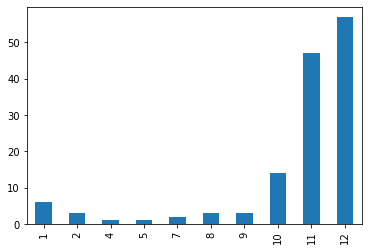

In [111]:
christmas = release_dates[(release_dates.title.str.contains('Christmas')) & (release_dates.country == 'USA')]
christmas.date.dt.month.value_counts().sort_index().plot(kind='bar')

### Section III - Q1: Make a bar plot with the following conditions
- Frequency of the number of movies with "Summer" in their title 
- Movies should be such that they are released in the USA.
- Show the frequency plot by month

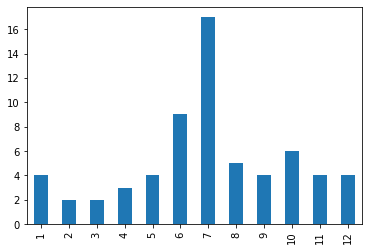

In [112]:
summer = release_dates[(release_dates.title.str.contains('Summer')) & (release_dates.country == 'USA')]
summer.date.dt.month.value_counts().sort_index().plot(kind='bar')

### Section III - Q2: Make a bar plot with the following conditions
- Frequency of the number of movies with "Action" in their title 
- Movies should be such that they are released in the USA.
- Show the frequency plot by week

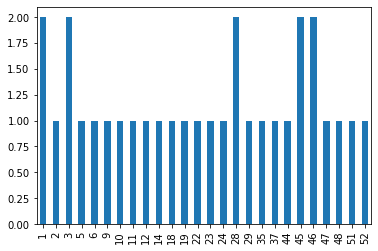

In [113]:
action = release_dates[(release_dates.title.str.contains('Action')) & (release_dates.country == 'USA')]
action.date.dt.week.value_counts().sort_index().plot(kind='bar')

### Section III - Q3: Show all the movies in which Keanu Reeves has played the lead role along with their   release date in the USA sorted by the date of release
- Hint: You might need to join or merge two datasets!

In [125]:
keanureeves = cast[(cast['name'] == 'Keanu Reeves') & (cast['n'] == 1)]
keanureeves = pd.merge(keanureeves, release_dates, how='inner', on='title')
keanureeves[keanureeves['country'] == 'USA'].sort_values(by='date')

,title,year_x,name,type,character,n,year_y,country,date,decade
446,Speed,1994,Keanu Reeves,actor,Jack Traven,1.0,1922,USA,1922-10-22,1920
448,Speed,1994,Keanu Reeves,actor,Jack Traven,1.0,1936,USA,1936-05-08,1930
522,Sweet November,2001,Keanu Reeves,actor,Nelson Moss,1.0,1968,USA,1968-02-08,1960
742,The Night Before,1988,Keanu Reeves,actor,Winston Connelly,1.0,1988,USA,1988-04-15,1980
78,Bill & Ted's Excellent Adventure,1989,Keanu Reeves,actor,Ted,1.0,1989,USA,1989-02-17,1980
69,Bill & Ted's Bogus Journey,1991,Keanu Reeves,actor,Ted,1.0,1991,USA,1991-07-19,1990
434,Little Buddha,1993,Keanu Reeves,actor,Siddhartha,1.0,1993,USA,1994-05-25,1990
451,Speed,1994,Keanu Reeves,actor,Jack Traven,1.0,1994,USA,1994-06-10,1990
371,Johnny Mnemonic,1995,Keanu Reeves,actor,Johnny Mnemonic,1.0,1995,USA,1995-05-26,1990
49,A Walk in the Clouds,1995,Keanu Reeves,actor,Paul Sutton,1.0,1995,USA,1995-08-11,1990


### Section III - Q4: Make a bar plot showing the months in which movies with Keanu Reeves tend to be released in the USA?

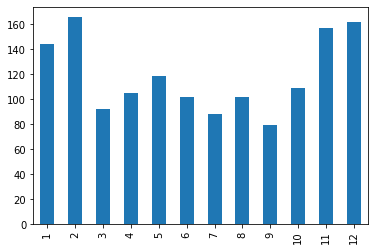

In [127]:
keanureeves = cast[(cast['name'] == 'Keanu Reeves')]
keanureeves = pd.merge(keanureeves, release_dates, how='inner', on='title')
keanureeves = keanureeves[keanureeves['release_dates'] == 'USA']

keanureeves.date.dt.month.value_counts().sort_index().plot(kind='bar')

### Section III - Q5: Make a bar plot showing the years in which movies with Ian McKellen tend to be released in the USA?

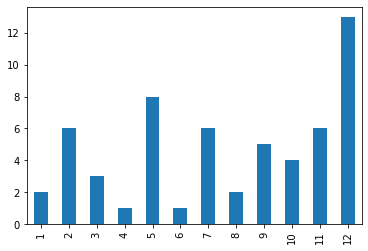

In [129]:
ianmckellen = cast[(cast['name'] == 'Ian McKellen')]
ianmckellen = pd.merge(ianmckellen, release_dates, how='inner', on='title')
ianmckellen = ianmckellen[ianmckellen['country'] == 'USA']

ianmckellen.date.dt.month.value_counts().sort_index().plot(kind='bar')